In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/Aoverbye/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


The Spills data includes data about hazardous waste spills, the county where they happened, what kind of spills they were, etc. The data for the spills Dataset was provided from the New York State Department of Environmental Conservation, and was first accessed Nov. 2nd, 2024.
The counties data set includes information for different locations of different counties and states. The counties data is from the United States Census Bureau and was accessed Nov. 2nd, 2024.

## 3. Import libraries

In [3]:
# Import in pandas
import pandas as pd

# Import in numpy
import numpy as np

# Import os
import os

# Import geopandas
import geopandas as gpd

# Import matplotlib
import matplotlib.pyplot as plt


## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [7]:
# Check current file path
os.getcwd()

'/Users/overbye/MEDS/EDS-220/eds220-hwk3'

In [6]:
# Read in spill data
spills = pd.read_csv('data/Spill_Incidents_20241102.csv')

# Create file path for counties data
fp = os.path.join('data','tl_2023_us_county','tl_2023_us_county.shp')

# Create counties variable with us county data
counties = gpd.read_file(fp)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [8]:
# Print the first 5 rows of spills
print(spills.head())

   Spill Number Program Facility Name                  Street 1 Street 2  \
0        107132                MH 864        RT 119/MILLWOOD RD      NaN   
1        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
2        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
3        204667            POLE 16091       GRACE AVE/BURKE AVE      NaN   
4        210559               POLE ON  FERDALE LOMIS RD / RT 52      NaN   

   Locality       County ZIP Code  SWIS Code  DEC Region  Spill Date  \
0  ELMSFORD  Westchester      NaN       6000           3  10/10/2001   
1    QUEENS       Queens      NaN       4101           2  08/21/2004   
2    QUEENS       Queens      NaN       4101           2  08/21/2004   
3     BRONX        Bronx      NaN        301           2  08/02/2002   
4   LIBERTY     Sullivan      NaN       5336           3  01/20/2003   

  Received Date Contributing Factor   Waterbody                 Source  \
0    10/10/2001             Unknown 

In [9]:
# Print the data types for spills columns
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [10]:
# View any unique values in the Material Family column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [11]:
# View any unique values in the County column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

To do preliminary exploration of the data, I used the `head()`, `dtypes()` and `.unique()` functions. The `head()` function showed an broad overview of the data, including some columns and some variables in those columns. The `dtypes()` function showed me the data types for each column, I noticed that the majority of the columns are objects. Lastly, I used the `unique()` function to view any unique variables in the `County` and `Material Family` columns. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [12]:
# Convert all columns to lower_snake_case
# Convert all columns to lower case
spills.columns = spills.columns.str.lower()

# Replace all spaces with underscores
spills.columns = spills.columns.str.replace(' ', '_')

In [13]:
# Convert spill_date to datetime format
spills['spill_date'] = pd.to_datetime(spills['spill_date'])

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [14]:
# Create DataFrame with only information from 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') & 
                 (spills['spill_date'].between('2023-01-01', '2023-10-31'))]


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [39]:
# Create F-string to confirm petr_23 only has data from 2023
print(f"Data is from 2023: {(petr_23['spill_date'].dt.year == 2023).all()}")
print(f"Data is from months numbered: {petr_23['spill_date'].dt.month.min()} to {petr_23['spill_date'].dt.month.max()}")

Data is from 2023: True
Data is from months numbered: 1 to 10


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [17]:
# Use assert to test if petr_23 has only data for petroleum spills
assert (petr_23['material_family'] == 'Petroleum').all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [42]:
# Create new data from name spills_per_county
spills_per_county = petr_23.groupby('county').size().reset_index(name='n_spills')

# View spills_per_county
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [19]:
# Print counties head
print(counties.head())

  STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0      31      039  00835841  31039  0500000US31039     Cuming   
1      53      069  01513275  53069  0500000US53069  Wahkiakum   
2      35      011  00933054  35011  0500000US35011    De Baca   
3      31      109  00835876  31109  0500000US31109  Lancaster   
4      31      129  00835886  31129  0500000US31129   Nuckolls   

           NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0     Cuming County   06      H1  G4020  None   None     None        A   
1  Wahkiakum County   06      H1  G4020  None   None     None        A   
2    De Baca County   06      H1  G4020  None   None     None        A   
3  Lancaster County   06      H1  G4020   339  30700     None        A   
4   Nuckolls County   06      H1  G4020  None   None     None        A   

        ALAND    AWATER     INTPTLAT      INTPTLON  \
0  1477563029  10772508  +41.9158651  -096.7885168   
1   680980771  61564427  +46.2946377  -123.4244583

In [20]:
# View counties column data types
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [21]:
# Check the CRS for the counties GeoDataFrame
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

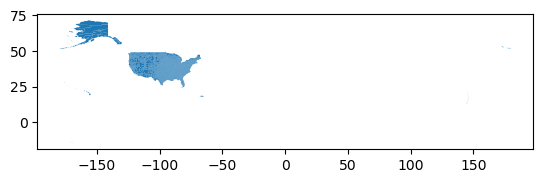

In [22]:
# Plot the counties GeoDataFrame
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

To do preliminary exploration of the data, I used the `head()`, `dtypes()` and `.unique()` functions. The `head()` function showed an broad overview of the data, it revealed that this dataset includes polygons and geographic information. The `dtypes()` function showed me the data types for each column, unlike the `spill` data, the `counties` data set includes a geometry type. Then, I used the `.crs` attribute to see the crs used and the names of the areas. Lastly, I plotted the data to see if it made a clear map of the USA states and territories. 

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [23]:
# Convert all columns to lower case
counties.columns = counties.columns.str.lower()

# Replace all spaces with underscores
counties.columns = counties.columns.str.replace(' ', '_')


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

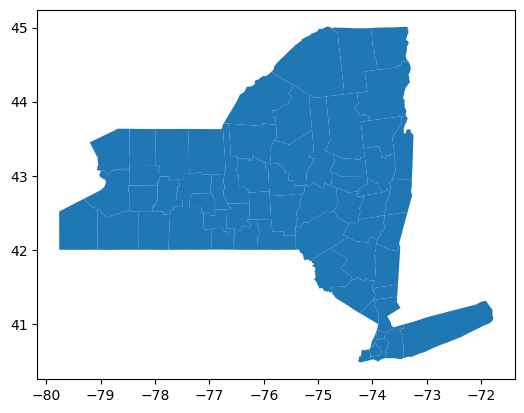

In [24]:
# Select counties in FIPS region 36/New York State
ny_counties = counties[counties['statefp'] == '36']

# Plot ny_counties
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [25]:
# a.
# Use .unique function to ensure each county name is only listed once
ny_counties_names = ny_counties['name'].unique()

# Print to view list 
print(ny_counties_names)

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [26]:
# b.
# Use .unique function to ensure each county name is only listed once
spills_per_county_names = spills_per_county['county'].unique()
print(spills_per_county_names)

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [47]:
# Use setdiff1d to view the names of counties in spills_per_county, but not in ny_counties
diff_names_spills = np.setdiff1d(spills_per_county_names, ny_counties_names, assume_unique = True).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [45]:
# Use setdiff1d to view the names of counties in ny_counties, but not in spills_per_county_names
diff_names_ny = np.setdiff1d(ny_counties_names, spills_per_county_names, assume_unique = True).tolist()
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [49]:
# e. 
# View number of spills in Tuscarora Indian Reservation using the spills_per_county DataFrame
tuscarora_spills = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']
print(tuscarora_spills)

                          county  n_spills
56  Tuscarora Indian Reservation         1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [51]:
# Update St Lawrence to St. Lawrence
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Create  assert state to check if reassignment worked
assert 'St. Lawrence' in spills_per_county['county'].values, "Update failed, 'St. Lawrence' not found."

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [52]:
# Rename ny_counties column 'name' to county
ny_counties.rename(columns={'name' : 'county'}, inplace = True)

/tmp/ipykernel_1827545/1081344725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_counties.rename(columns={'name' : 'county'}, inplace = True)


In [53]:
# Merge ny_counties and spills_per_county via the 'county' column
spills_counties_merge = pd.merge(ny_counties, spills_per_county, on='county', how='inner')

# Print spills_counties_merge
print(spills_counties_merge)

   statefp countyfp  countyns  geoid         geoidfq       county  \
0       36      101  00974148  36101  0500000US36101      Steuben   
1       36      091  00974143  36091  0500000US36091     Saratoga   
2       36      003  00974100  36003  0500000US36003     Allegany   
3       36      075  00974136  36075  0500000US36075       Oswego   
4       36      111  00974153  36111  0500000US36111       Ulster   
..     ...      ...       ...    ...             ...          ...   
57      36      051  00974124  36051  0500000US36051   Livingston   
58      36      025  00974111  36025  0500000US36025     Delaware   
59      36      071  00974134  36071  0500000US36071       Orange   
60      36      093  00974144  36093  0500000US36093  Schenectady   
61      36      005  00974101  36005  0500000US36005        Bronx   

              namelsad lsad classfp  mtfcc csafp cbsafp metdivfp funcstat  \
0       Steuben County   06      H1  G4020   236  18500     None        A   
1      Saratoga C

In [54]:
# b.
# Assign the merged DataFrame to ny_counties
ny_counties = spills_counties_merge


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [55]:
# c.
# Add one spill to Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# View Niagara county 
print(ny_counties[ny_counties['county'] == 'Niagara'])

   statefp countyfp  countyns  geoid         geoidfq   county        namelsad  \
45      36      063  00974130  36063  0500000US36063  Niagara  Niagara County   

   lsad classfp  mtfcc csafp cbsafp metdivfp funcstat       aland      awater  \
45   06      H1  G4020   160  15380     None        A  1352876140  1598772310   

       intptlat      intptlon  \
45  +43.2726719  -078.8129431   

                                             geometry  n_spills  
45  POLYGON ((-78.49165 43.08396, -78.49179 43.084...        89  


<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



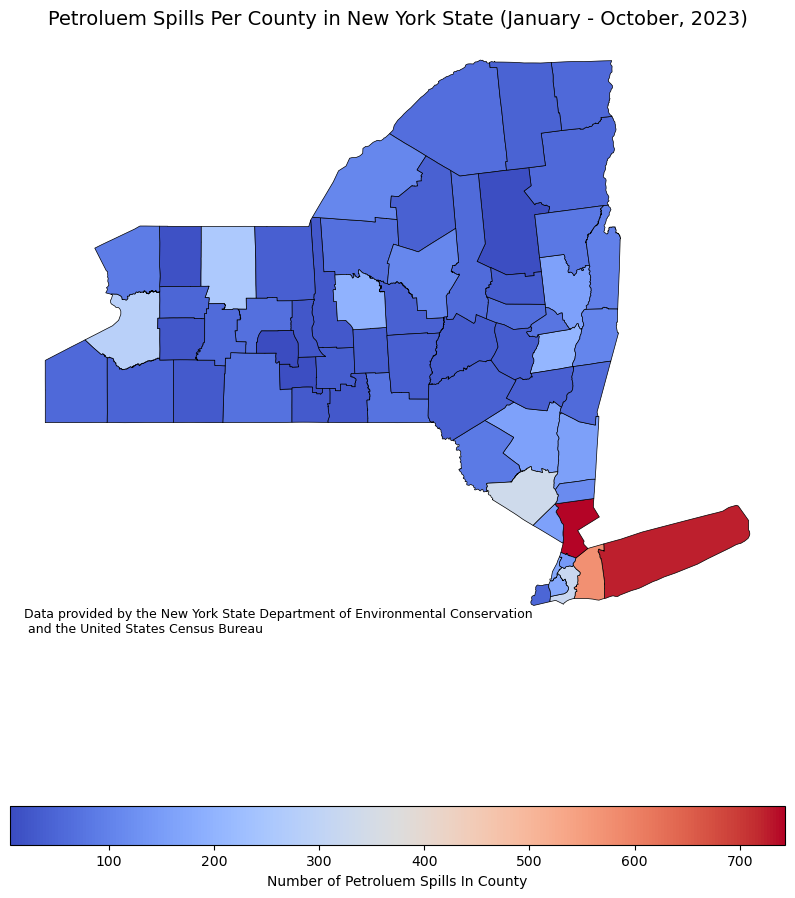

In [126]:
# a.
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot map using n_spills column
ny_counties.plot(column='n_spills', ax=ax, legend=True,
                 legend_kwds={'label': "Number of Petroluem Spills In County",
                              'orientation': "horizontal"},
                 cmap='coolwarm', 
                 edgecolor='black', linewidth=0.5)
plt.annotate("Data provided by the New York State Department of Environmental Conservation \n and the United States Census Bureau ", 
             xy = (-80,40.25), fontsize = 9)
ax.set_title('Petroluem Spills Per County in New York State (January - October, 2023)', fontsize=14)
ax.set_axis_off()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

This is a map of spills in New York State. The top three counties with the most spills are Westchester  (743), Suffolk (723) and Nassau (576)

In [ ]:
# Sort the DataFrame by 'n_spills' in descending order and select the top 3 counties
top_3_counties = spills_per_county.sort_values(by='n_spills', ascending=False).head(3)

# Print top 3 counties
print(top_3_counties)